In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Bring back our list of aeronet stations...
filename = 'data/aeronet_locations_v3.txt'
station_list = pd.read_csv(filename, skiprows=1)
station_list.columns = ['site', 'lon', 'lat', 'elev']

In [3]:
# Options to increase figure size
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams.update({'font.size': 16})

from cartopy import crs as ccrs

# Adding ticks to the plot

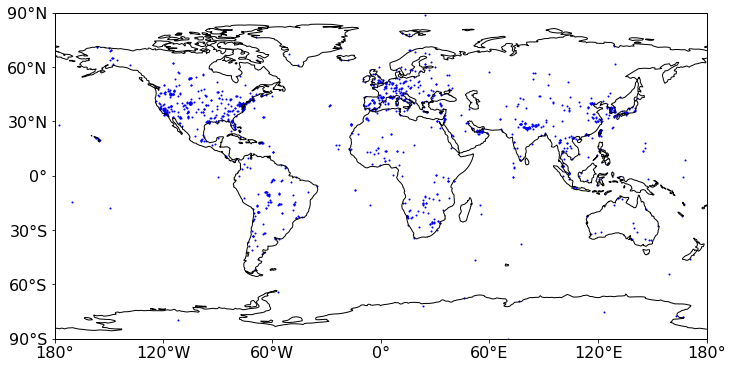

In [4]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

from_proj = ccrs.PlateCarree()
to_proj = ccrs.PlateCarree()

ax = plt.axes(projection=to_proj)
ax.coastlines()
plt.scatter(station_list['lon'], station_list['lat'], color='blue',
            s=1, transform=from_proj)
ax.set_xticks(np.arange(-180, 180 + 60, 60), crs=ccrs.PlateCarree())
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
plt.show()

In [5]:
import xarray

In [6]:
# Import your data...
filename = 'data/JRR-AOD_v1r2_npp_s201811082130296_e201811082131537_c201811082228260.nc'
npp = xarray.open_dataset(filename)

# Print a list of variables
list(npp.variables)

['Latitude', 'Longitude', 'QCAll', 'AOD550']

In [7]:
AOD_NPP = npp['AOD550']
lat_NPP = npp['Latitude']
lon_NPP = npp['Longitude']

# Changing projection with NPP data

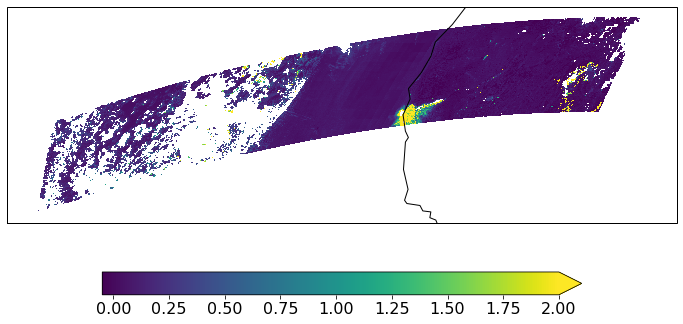

In [12]:
from_proj = ccrs.PlateCarree()
to_proj = ccrs.EqualEarth()

# Using cartopy, create the map projection and plot the data
ax = plt.axes(projection=to_proj)
ax.coastlines()

# Can change color scheme using the cmap argument
plt.pcolormesh(lon_NPP, lat_NPP, AOD_NPP, transform=from_proj, vmax=2)

plt.colorbar(orientation="horizontal", fraction=0.07, extend='max')

# To zoom in on data (syntax is lon1, lon2, lat1, lat2)
#ax.set_extent([-125, -120, 30, 60], crs=from_proj)

plt.show()

# Multiple swaths on the same plot

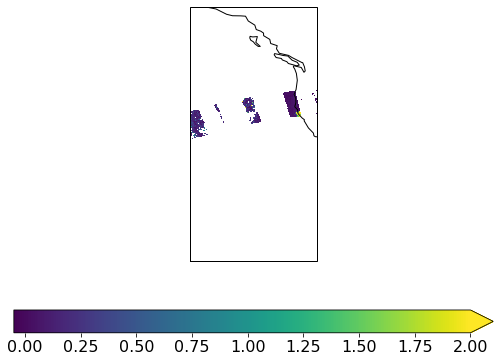

In [22]:
from_proj = ccrs.PlateCarree()
to_proj = ccrs.PlateCarree()

# Using cartopy, create the map projection and plot the data
ax = plt.axes(projection=to_proj)
ax.coastlines()

# Can change color scheme using the cmap argument
plt.pcolormesh(lon_NPP, lat_NPP, AOD_NPP, transform=from_proj, vmax=2)
#plt.pcolormesh(lon_NPP, lat_NPP - 30, AOD_NPP, transform=from_proj, vmax=2)

plt.colorbar(orientation="horizontal", fraction=0.07, extend='max')
ax.set_extent([-145, -120, 10, 60], crs=from_proj)
#ax.set_global()

plt.show()